![portada](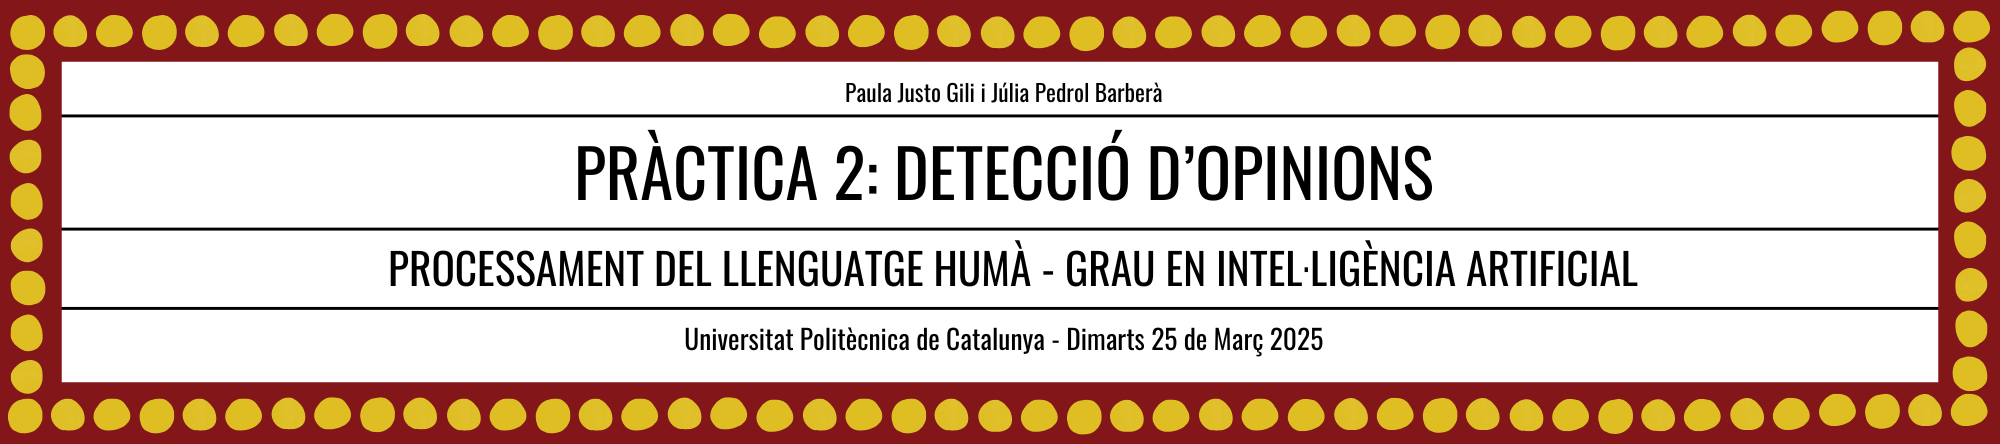
)

## **√çNDEX**
- [INTRODUCCI√ì](#introducci√≥)
- [LECTURA DE DADES](#lectura-de-dades)
- [PARTICI√ì EN TRAIN I TEST](#partici√≥-en-train-i-test)
- [LEMATITZACI√ì](#lematitzaci√≥)
    - [1. POS Tagging](#1-pos-tagging)
    - [2. Lematitzaci√≥ dels textos](#2-lematitzaci√≥-dels-textos)
- [PREPROCESSAT](#preprocessat)
- [PART SUPERVISADA](#part-supervisada)
    - [Vectoritzaci√≥ del textamb CountVectorizer](#vectoritzaci√≥-del-text-amb-countvectorizer)
    - [Entrenament dels models supervisats](#entrenament-dels-models-supervisats)
        - [1. Multinomial Naive Bayes](#1-multinomial-naive-bayes)
        - [2. Random Forest](#2-random-forest)
        - [3. Regressi√≥ Log√≠stica](#3-regressi√≥-log√≠stica)
        - [4. SVM (Support Vector Machine)](#4-svm-support-vector-machine)
        - [Comparaci√≥ dels models amb la Corba de ROC](#comparaci√≥-de-models-amb-la-corba-roc)
        - [Selecci√≥ del millor model](#selecci√≥-del-millor-model)
        - [Conclusi√≥ primera part](#conclusi√≥-primera-part)
- [PART NO SUPERVISADA](#part-no-supervisada)
    - [Explicaci√≥ del funcionament](#explicaci√≥-del-funcionament)
- [COMPARACI√ì MODEL SUPERVISAT I NO SUPERVISAT](#comparaci√≥-model-supervisat-i-no-supervisat)
- [AN√ÄLISI DELS ERRORS](#an√†lisi-dels-errors)
- [CONCLUSIONS GENERALS](#conclusions-generals)

## **INTRODUCCI√ì**
---

En aquesta pr√†ctica abordarem la detecci√≥ autom√†tica d‚Äôopinions positives o negatives en cr√≠tiques de pel¬∑l√≠cules. El treball es troba dividit en dues parts.

**En la primera** implementarem diversos models **d‚Äôaprenentatge supervisat** utilitzant el corpus Movie Reviews. Aplicarem t√®cniques de preprocessament, representarem els textos amb el CountVectorizer i entrenarem diversoso model de classificaci√≥ per predir la polaritat de les opinions. Tamb√© definirem un protocol de validaci√≥ i analitzarem quin dels models ens proporciona una millor classificaci√≥, comparant la seva precisi√≥ i la matriu de confusi√≥ corresponent.

**Mentre que en la segona,** treballarem amb un **enfocament no supervisat.** Utilitzarem el desambiguador Lesk per obtenir els synsets de les paraules i consultarem el SentiWordNet per obtenir-ne els valors de polaritat. Ens plantejarem com combinar aquests valors, per determinar si el text expressa una opini√≥ positiva o negativa, i provarem diferents combinacions de categories gramaticals (adjectius, noms, verbs, adverbis). 

Finalment, compararem els resultats d‚Äôaquesta estrat√®gia no supervisada amb els obtinguts en la part supervisada i analitzarem els errors que s'han com√©s en les deteccions d'opini√≥ (tant en la part supervisada com en la no supervisada).

## **LECTURA DE DADES**
---

In [1]:
%pip install --user -U nltk
%pip install --user -U numpy
%pip install svgling

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [2]:
import nltk
nltk.download('movie_reviews')
nltk.download('stopwords')
from nltk.corpus import movie_reviews as mr
from nltk.corpus import stopwords

[nltk_data] Downloading package movie_reviews to
[nltk_data]     /Users/paula/nltk_data...
[nltk_data]   Package movie_reviews is already up-to-date!
[nltk_data] Downloading package stopwords to /Users/paula/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [3]:
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet
from nltk.tokenize import word_tokenize
from nltk import pos_tag

# Baixar recursos necessaris
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('punkt')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/paula/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to /Users/paula/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /Users/paula/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package punkt to /Users/paula/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [4]:
file_ids = mr.fileids()
print(f"\033[1mTotal de ressenyes:\033[0m {len(file_ids)}")  # 2000 ressenyes (1000 pos, 1000 neg)

Total de ressenyes: 2000


In [5]:
# Veure els identificadors dels documents
print("\033[1mPrimeres 5 ressenyes (nom de l'arxiu):\033[0m")
print(mr.fileids()[:5])

# Veure les categories (positives o negatives)
print("\n\033[1mCategories disponibles:\033[0m")
print(mr.categories())

# Veure una ressenya concreta (primer document)
print("\n\033[1mContingut del primer document (paraules):\033[0m")
print(mr.words(mr.fileids()[0])[:50])  # Mostrem nom√©s 50 paraules per veure qu√® cont√©


Primeres 5 ressenyes (nom de l'arxiu):
['neg/cv000_29416.txt', 'neg/cv001_19502.txt', 'neg/cv002_17424.txt', 'neg/cv003_12683.txt', 'neg/cv004_12641.txt']

Categories disponibles:
['neg', 'pos']

Contingut del primer document (paraules):
['plot', ':', 'two', 'teen', 'couples', 'go', 'to', 'a', 'church', 'party', ',', 'drink', 'and', 'then', 'drive', '.', 'they', 'get', 'into', 'an', 'accident', '.', 'one', 'of', 'the', 'guys', 'dies', ',', 'but', 'his', 'girlfriend', 'continues', 'to', 'see', 'him', 'in', 'her', 'life', ',', 'and', 'has', 'nightmares', '.', 'what', "'", 's', 'the', 'deal', '?', 'watch']


## **PARTICI√ì EN TRAIN I TEST**
---

Al principi vam considerar de dividir les dades en **train**, **validation** i **test**, per√≤ al final vam veure que no valia la pena, ja que quan utilitzem el `GridSearchCV` per entrenar els models supervisats, aquest ja fa una validaci√≥ interna per provar diferents combinacions d‚Äôhiperpar√†metres i escollir la millor. √âs a dir, ja fa ell sol una mena de partici√≥ entre train i validation.

Per aix√≤, nom√©s fem una **partici√≥ entre train i test**, la qual ens serveix per entrenar el model i despr√©s avaluar-ne el rendiment. A m√©s, utilitzem una partici√≥ estratificada, que mant√© la proporci√≥ de classes (positives i negatives) tant al train com al test. Fer aquesta partici√≥ estratificada √©s important perqu√® el model mostri una distribuci√≥ semblant de dades en els dos conjunts.

In [6]:
from sklearn.model_selection import train_test_split

# Obtenir les etiquetes de cada document
etiquetes = [mr.categories(file_id)[0] for file_id in file_ids]

# Fer la partici√≥ estratificada
train_ids, test_ids = train_test_split(
    file_ids,
    test_size=0.2,
    random_state=123,
    stratify=etiquetes 
)

print(f"\033[1mTrain: {len(train_ids)} documents, Test: {len(test_ids)} documents\033[0m\n")

train_etiquetes = [mr.categories(file_id)[0] for file_id in train_ids]
test_etiquetes = [mr.categories(file_id)[0] for file_id in test_ids]
print(f"Train ‚Üí Positius: {train_etiquetes.count('pos')}, Negatius: {train_etiquetes.count('neg')}")
print(f"Test  ‚Üí Positius: {test_etiquetes.count('pos')}, Negatius: {test_etiquetes.count('neg')}")


Train: 1600 documents, Test: 400 documents

Train ‚Üí Positius: 800, Negatius: 800
Test  ‚Üí Positius: 200, Negatius: 200


In [7]:
# Obtenim els textos de cada conjunt
train_texts = [" ".join(mr.words(file_id)) for file_id in train_ids]
test_texts = [" ".join(mr.words(file_id)) for file_id in test_ids]

## **LEMATITZACI√ì**
---

### **1. POS tagging**

Abans de poder fer la lematitzaci√≥ dels textos, necessitem saber quina categoria gramatical t√© cada paraula (si √©s un verb, un nom, un adjectiu...). Aix√≤ √©s important perqu√® el lematitzador necessita aquesta informaci√≥ per saber com transformar cada paraula a la seva forma base.

Per aconseguir aix√≤, fem **POS tagging** (Part-of-Speech tagging). Utilitzem la funci√≥ `pos_tag` de NLTK. La qual primer el que fa √©s tokenitzar el text per despr√©s poder retornar els pos_tags de cada token.

Un cop tenim aix√≤, apliquem el POS tagging tant al conjunt de train com al de test, ja que despr√©s haurem de lematitzar tots dos de la mateixa manera.

In [8]:
from nltk import pos_tag, word_tokenize

def obtenir_postags(text):
    tokens = word_tokenize(text)
    pos_tags = pos_tag(tokens)
    return pos_tags

In [9]:
# Aplicar POS tagging als textos de train i test
train_pos_tags = [obtenir_postags(text) for text in train_texts]
test_pos_tags = [obtenir_postags(text) for text in test_texts]

print("\033[1mExemple POS Train:\033[0m", train_pos_tags[0][:500])  
print("\033[1mExemple POS Test:\033[0m", test_pos_tags[0][:500])


Exemple POS Train: [('capsule', 'NN'), (':', ':'), ('the', 'DT'), ('much', 'RB'), ('anticipated', 'VBN'), ('re', 'NN'), ('-', ':'), ('adaptation', 'NN'), ('of', 'IN'), ('the', 'DT'), ('pierre', 'NN'), ('boulle', 'NN'), ('novel', 'NN'), ('comes', 'VBZ'), ('to', 'TO'), ('the', 'DT'), ('screen', 'NN'), ('as', 'IN'), ('a', 'DT'), ('dark', 'NN'), ('and', 'CC'), ('a', 'DT'), ('little', 'JJ'), ('dreary', 'JJ'), ('film', 'NN'), ('with', 'IN'), ('lots', 'NNS'), ('of', 'IN'), ('chases', 'NNS'), ('and', 'CC'), ('fighting', 'NN'), (',', ','), ('but', 'CC'), ('very', 'RB'), ('little', 'JJ'), ('intelligence', 'NN'), ('.', '.'), ('visually', 'RB'), ('there', 'EX'), ('is', 'VBZ'), ('much', 'RB'), ('to', 'TO'), ('like', 'VB'), ('about', 'IN'), ('this', 'DT'), ('version', 'NN'), (',', ','), ('but', 'CC'), ('the', 'DT'), ('approach', 'NN'), ('is', 'VBZ'), ('to', 'TO'), ('take', 'VB'), ('an', 'DT'), ('adventure', 'NN'), ('after', 'IN'), ('the', 'DT'), ('style', 'NN'), ('of', 'IN'), ('gulliver', 'NN'), ("'

### **2. Lematitzaci√≥ dels textos**

Ara que ja tenim les paraules etiquetades amb la seva categoria gramatical (noms, verbs, adjectius ...), podem passar a fer la **lematitzaci√≥**. Amb la lematitzaci√≥ b√†sicament el que fem √©s reduir cada paraula a la seva forma base. Per exemple, si tenim el verb *"running"*, la idea √©s convertir-lo a *"run"*. D'aquesta forma aconseguim agrupar totes les formes d'una mateixa paraula i treure soroll al text.

Per fer-ho, fem servir el lematitzador de NLTK (`WordNetLemmatizer`). Per tal que el lematitzador sapigui quin tipus de paraula est√† tractant, hem creat un diccionari (`pos_dict`) que transforma les etiquetes del POS tagging al format que ent√©n el lematitzador.

Un cop tenim aix√≤, li passem cada paraula amb el seu POS tag i obtenim el seu lema. Aix√≤ ho fem per tots els textos de train i de test, perqu√® aix√≠ tot el corpus queda lematitzat de la mateixa manera.

In [10]:
import nltk
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet

# Inicialitzar el lematitzador
wnl = WordNetLemmatizer()

# Diccionari per convertir els POS tags de NLTK a WordNet
pos_dict = {
    'NN': wordnet.NOUN, 'NNS': wordnet.NOUN, 'NNP': wordnet.NOUN, 'NNPS': wordnet.NOUN,
    'JJ': wordnet.ADJ, 'JJR': wordnet.ADJ, 'JJS': wordnet.ADJ,
    'VB': wordnet.VERB, 'VBD': wordnet.VERB, 'VBG': wordnet.VERB, 'VBN': wordnet.VERB,
    'VBP': wordnet.VERB, 'VBZ': wordnet.VERB,
    'RB': wordnet.ADV, 'RBR': wordnet.ADV, 'RBS': wordnet.ADV
}

# Funci√≥ per lematitzar una paraula amb el seu POS tag
def lemmatize(word, pos_tag):
    pos = pos_dict.get(pos_tag, wordnet.NOUN)
    return wnl.lemmatize(word, pos)


In [11]:
# Aplicar lematitzaci√≥ als textos de train i test
train_texts_lem = [" ".join(lemmatize(word, tag) for word, tag in train_pos_tags[i]) for i in range(len(train_pos_tags))]
test_texts_lem = [" ".join(lemmatize(word, tag) for word, tag in test_pos_tags[i]) for i in range(len(test_pos_tags))]

print("\033[1mExemple de text lematitzat (Train):\033[0m", train_texts_lem[0][:500])
print("\033[1mExemple de text lematitzat (Test):\033[0m", test_texts_lem[0][:500])

Exemple de text lematitzat (Train): capsule : the much anticipate re - adaptation of the pierre boulle novel come to the screen a a dark and a little dreary film with lot of chase and fighting , but very little intelligence . visually there be much to like about this version , but the approach be to take an adventure after the style of gulliver ' s travel and treat it a an action film . that make it a film without much center . , 0 ( - 4 to + 4 ) pierre boulle , author of the bridge on the river kwai , write planet of the ape ( a 
Exemple de text lematitzat (Test): country and legal system that take the rule of law principle seriously , have forbid judge and jury to make judgement in all matter that could involve them personally . luckily , movie reviewer aren ' t burden with such legislation . otherwise , small pool of very special movie would be forever ignore by this reviewer . in case of star war , 1977 science fiction epic by george lucas , the consequence would be even more sever

## **PREPROCESSAT**
---
Abans d‚Äôentrenar cap model, cal netejar el text perqu√® els algoritmes treballin nom√©s amb la informaci√≥ rellevant. En el nostre cas, hem aplicat una s√®rie de passos de preprocessament als dos conjunts de dades (train i test).

Els passos que hem fet pel preprocessat s√≥n:

1. **Eliminar d√≠gits**: hem tret tots els n√∫meros del text, ja que normalment no aporten gaire valor en aquest tipus d‚Äôan√†lisi.
2. **Convertir el text a min√∫scules**: aix√≠ evitem comptar la mateixa paraula dues vegades nom√©s perqu√® una comen√ßa amb maj√∫scula i l‚Äôaltra no.
3. **Eliminar signes de puntuaci√≥**: tamb√© els hem tret perqu√® no tenen significat sem√†ntic per al model i poden distorsionar l‚Äôan√†lisi.

Un cop aplicat aquest preprocessat, hem passat al seg√ºent pas:

4. **Eliminar les stopwords**: aquestes s√≥n paraules molt freq√ºents com *"the"*, *"is"*, *"and"*, que no aporten gaire informaci√≥ √∫til per al model. Les hem eliminat utilitzant la llista de stopwords per defecte de la llibreria nltk.

Aquestes transformacions s‚Äôhan aplicat tant al conjunt de **train** com al de **test**, per mantenir la coher√®ncia entre els dos.

In [12]:
import string

# Funci√≥ per eliminar d√≠gits
def elimina_digits(text):
    text_sense_digits = ''.join([char for char in text if not char.isdigit()])
    return text_sense_digits

# Funci√≥ per convertit tot el text en minuscules
def converteix_minuscules(text):
    text_minuscules = text.lower()
    return text_minuscules

# Funci√≥ per eliminar els signes de puntuaci√≥ del text
def elimina_puntuacio(text):
    text_sense_puntuacio = ''.join([char for char in text if char not in string.punctuation])
    return text_sense_puntuacio

In [13]:
# Apliquem eliminaci√≥ de d√≠gits, puntuaci√≥ i conversi√≥ a min√∫scules
train_texts = [converteix_minuscules(elimina_puntuacio(elimina_digits(text))) for text in train_texts_lem]
test_texts = [converteix_minuscules(elimina_puntuacio(elimina_digits(text))) for text in test_texts_lem]

In [14]:
# Funci√≥ per eliminar stopwords
def remove_stopwords_with_list(text, stopword_list):
    words = text.split()
    filtered_text = [word for word in words if word.lower() not in stopword_list]  
    return " ".join(filtered_text)


In [15]:
# Identificar les stopwords eliminades
all_stopwords = set(stopwords.words('english')) 
train_texts_clean = [remove_stopwords_with_list(text, all_stopwords) for text in train_texts]
test_texts_clean = [remove_stopwords_with_list(text, all_stopwords) for text in test_texts]

print("\033[1mExemple Train (Original):\033[0m", train_texts[0][:500])
print("\033[1mExemple Train (Sense stopwords):\033[0m", train_texts_clean[0][:500])

print("\n\033[1mExemple Test (Original):\033[0m", test_texts[0][:500])
print("\033[1mExemple Test (Sense stopwords):\033[0m", test_texts_clean[0][:500])

Exemple Train (Original): capsule  the much anticipate re  adaptation of the pierre boulle novel come to the screen a a dark and a little dreary film with lot of chase and fighting  but very little intelligence  visually there be much to like about this version  but the approach be to take an adventure after the style of gulliver  s travel and treat it a an action film  that make it a film without much center       to    pierre boulle  author of the bridge on the river kwai  write planet of the ape  a  k  a  monkey plane
Exemple Train (Sense stopwords): capsule much anticipate adaptation pierre boulle novel come screen dark little dreary film lot chase fighting little intelligence visually much like version approach take adventure style gulliver travel treat action film make film without much center pierre boulle author bridge river kwai write planet ape k monkey planet novel social satire read lot like fifth book gulliver travel human discover planet role ape human reverse unlike role

## **PART SUPERVISADA**
---

### **Vectoritzaci√≥ del text amb CountVectorizer**

Un cop tenim els textos nets (sense digits, ni puntuaci√≥, ni stopwords...), el seg√ºent pas √©s convertir-los en una representaci√≥ num√®rica perqu√® els models els puguin entendre. Per fer aix√≤ hem utilitzat el `CountVectorizer` de `sklearn`.

A l‚Äôhora de configurar el `CountVectorizer`, hem escollit uns par√†metres concrets pensant sobretot en **evitar el sobreajustament** i fer que el model generalitzi millor. 

La configuraci√≥ ha estat la seg√ºent:

- `max_features=2000` ‚Üí limitem el nombre de caracter√≠stiques a les 2000 m√©s informatives. D‚Äôaquesta manera redu√Øm la complexitat del model i evitem tenir una matriu gegant amb milers de paraules que potser nom√©s surten un cop i no aporten res.
  
- `min_df=10` ‚Üí nom√©s incloem paraules que apareixen en m√≠nim 10 documents. Aix√≤ ens permet filtrar soroll i paraules molt rares o molt espec√≠fiques, que poden fer que el model s‚Äôajusti massa als exemples concrets.

- `ngram_range=(1, 2)` ‚Üí hem incl√≤s unigrams i bigrams perqu√®, a m√©s de paraules individuals, tamb√© volem tenir en compte combinacions que poden donar m√©s context (per exemple, ‚Äúnot good‚Äù √©s molt diferent de ‚Äúgood‚Äù sol). Aix√≤ ajuda a captar una mica m√©s de significat, per√≤ sense afegir massa complexitat.

- `binary=True` ‚Üí en lloc de comptar quantes vegades surt una paraula, nom√©s mirem si apareix o no. Aix√≤ ho fem perqu√® ens interessa m√©s la pres√®ncia de certs mots que no pas la seva repetici√≥, i a m√©s ens ajuda a reduir l‚Äôimpacte de documents molt llargs.

En resum, hem triat aquests valors buscant un equilibri entre captar la informaci√≥ √∫til i no passar-nos de detall, per evitar el t√≠pic problema del sobreajustament i aconseguir que el model funcioni b√© amb dades noves.

Despr√©s de fer aquesta vectoritzaci√≥, hem convertit les matrius (que crea aquest m√®tode) a DataFrame per visualitzar millor el resultat (tamb√© per poder veure la matriu al complet l'hem guardat en un fitxer .csv).

Cal mencionar que inicialment vam provar de fer una reducci√≥ de dimensionalitat amb PCA, despr√©s de la vectoritzaci√≥, per√≤ els resultats van empitjorar for√ßa. A m√©s, com amb `max_features` ja pod√≠em controlar una mica la mida de la matriu i evitar que fos massa gran vam decidir no aplicar el PCA i optimitzar nom√©s aquest par√†metre del `CountVectorizer`.

In [16]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer

# Vectoritzar el text
vectorizer = CountVectorizer(max_features=2000, min_df=10, ngram_range=(1, 2), stop_words=None, binary=True)
X_train = vectorizer.fit_transform(train_texts_clean).toarray()
X_test = vectorizer.transform(test_texts_clean).toarray()

# Convertir a DataFrame per veure millor la matriu
df_train = pd.DataFrame(X_train, columns=vectorizer.get_feature_names_out())
df_test = pd.DataFrame(X_test, columns=vectorizer.get_feature_names_out())

# Mostrar la matriu completa de Train
print("\033[1mMatriu de Train:\033[0m")
print(df_train)

# Mostrar la dimensi√≥ de la matriu
print("\n\033[1mDimensions de les matrius:\033[0m")
print(f"Train: {df_train.shape}, Test: {df_test.shape}")

# Guardar la matriu en un fitxer .csv
df_train.to_csv("matriu_countvectorizer.csv", index=False)
print("\nMatriu guardada com a 'matriu_countvectorizer.csv'.")


Matriu de Train:
      abandon  ability  able  absolutely  absurd  academy  academy award  \
0           0        0     0           0       0        0              0   
1           0        0     0           0       0        0              0   
2           0        0     0           0       0        0              0   
3           0        0     0           1       0        0              0   
4           0        0     0           0       0        0              0   
...       ...      ...   ...         ...     ...      ...            ...   
1595        0        0     0           0       0        0              0   
1596        0        0     1           0       0        0              0   
1597        0        0     1           0       0        0              0   
1598        0        0     0           0       0        0              0   
1599        0        1     0           0       0        0              0   

      accent  accept  accident  ...  year  year ago  year later  year 

### **Entrenament dels Models Supervisats**

Per entrenar els models supervisats, primer hem transformat les etiquetes dels documents en valors num√®rics, on `'pos'` s‚Äôha codificat com a `1` i `'neg'` com a `0`. Aix√≤ ens permet treballar amb classificadors que esperen valors binaris com a sortida.

A continuaci√≥, hem entrenat diversos classificadors supervisats amb el conjunt de dades vectoritzat i net, aplicant una cerca de la millor combinaci√≥ d‚Äôhiperpar√†metres amb `GridSearchCV`. Aix√≤ ens assegura que el model que escollim estigui ben ajustat al conjunt de train sense sobreajustar-se.

Hem decidit provar **quatre classificadors supervisats diferents** per comparar quin s‚Äôadaptava millor a la nostra tasca de classificaci√≥ d‚Äôopinions. Cada model t√© caracter√≠stiques i maneres de funcionar diferents, i provar-los ens ha ajudat a veure quina estrat√®gia funciona millor amb el nostre conjunt de dades.

Els models que hem provat s√≥n:

- **Multinomial Naive Bayes** ‚Üí √âs un model molt utilitzat en classificaci√≥ de text perqu√® assumeix que les paraules s√≥n independents entre elles. √âs r√†pid, simple i sol funcionar sorprenentment b√© amb representacions com el `CountVectorizer`.

- **Random Forest** ‚Üí √âs un model m√©s complex i basat en la combinaci√≥ de molts arbres de decisi√≥. √âs bo per capturar relacions m√©s profundes dins les dades, i a m√©s ens permet controlar molt b√© el sobreajustament gr√†cies als seus hiperpar√†metres.

- **Regressi√≥ Log√≠stica** ‚Üí √âs un model lineal molt potent per classificaci√≥ bin√†ria. Tamb√© √©s molt interpretables i r√†pid d‚Äôentrenar, aix√≠ que serveix molt b√© com a base de comparaci√≥.

- **SVM (Support Vector Machine)** ‚Üí Les m√†quines de vectors de suport s√≥n especialment bones en situacions amb moltes caracter√≠stiques (com el cas del text vectoritzat). Amb el `kernel` lineal i una bona regularitzaci√≥, poden funcionar molt b√© i evitar el sobreajustament.

Gr√†cies a aix√≤, hem pogut escollir el model **amb millor rendiment general**, tant pel que fa a l‚Äô**accuracy** com a l‚Äô**AUC** a la corba ROC, i tenir m√©s confian√ßa que el nostre sistema funciona b√© amb dades noves.

In [17]:
# Etiquetes basades en les categories: 'pos' ‚Üí 1, 'neg' ‚Üí 0
y_train = [1 if mr.categories(file_id)[0] == 'pos' else 0 for file_id in train_ids]
y_test = [1 if mr.categories(file_id)[0] == 'pos' else 0 for file_id in test_ids]

In [18]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, accuracy_score
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay, roc_curve, auc

#### **1. Multinomial Naive Bayes**

Per aquest model hem provat diferents valors de `alpha`, que √©s el par√†metre de suavitzat de Laplace. Aix√≤ ajuda a evitar problemes quan hi ha paraules que no apareixen en algun document.

```python
"alpha": [1.0, 2.0, 5.0, 10.0]
```

Hem triat aquesta gamma perqu√® valors massa petits poden fer que el model sigui massa sensible a paraules poc freq√ºents, i valors massa alts poden suavitzar massa i perdre precisi√≥. L‚Äôobjectiu era trobar l‚Äôequilibri entre simplicitat i rendiment.

A m√©s, hem aplicat una validaci√≥ creuada amb `cv=10` durant la cerca de la millor combinaci√≥ d‚Äôhiperpar√†metres amb `GridSearchCV`. Aix√≤ ens ha perm√®s tenir una avaluaci√≥ m√©s estable i realista del rendiment del model, i evitar que els resultats depenguin massa d‚Äôuna sola partici√≥ concreta.


MultinomialNB
Millors par√†metres: {'alpha': 5.0}
Accuracy TRAIN: 0.8919
Accuracy TEST: 0.8525


              precision    recall  f1-score   support

     Negatiu       0.83      0.89      0.86       200
     Positiu       0.88      0.82      0.85       200

    accuracy                           0.85       400
   macro avg       0.85      0.85      0.85       400
weighted avg       0.85      0.85      0.85       400



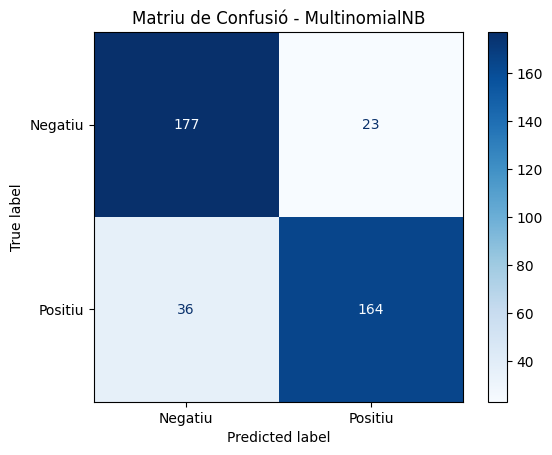

In [19]:
from sklearn.naive_bayes import MultinomialNB

grid_nb = GridSearchCV(MultinomialNB(), {"alpha": [1.0, 2.0, 5.0, 10.0]}, cv=10, scoring='accuracy', n_jobs=-1)
grid_nb.fit(X_train, y_train)
nb_model = grid_nb.best_estimator_

y_train_pred_nb = nb_model.predict(X_train)
y_test_pred_nb = nb_model.predict(X_test)

print("\n\033[1mMultinomialNB\033[0m")
print("\033[1mMillors par√†metres:\033[0m", grid_nb.best_params_)
print(f"\033[1mAccuracy TRAIN:\033[0m {accuracy_score(y_train, y_train_pred_nb):.4f}")
print(f"\033[1mAccuracy TEST:\033[0m {accuracy_score(y_test, y_test_pred_nb):.4f}")
print("\n")
print(classification_report(y_test, y_test_pred_nb, target_names=["Negatiu", "Positiu"]))

# Matriu de confusi√≥
ConfusionMatrixDisplay.from_predictions(y_test, y_test_pred_nb, display_labels=["Negatiu", "Positiu"], cmap="Blues")
plt.title("Matriu de Confusi√≥ - MultinomialNB")
plt.grid(False)
plt.show()

# ROC
y_proba_nb = nb_model.predict_proba(X_test)[:, 1]
fpr_nb, tpr_nb, _ = roc_curve(y_test, y_proba_nb)
auc_nb = auc(fpr_nb, tpr_nb)


#### **2. Random Forest**

Per aquest model, hem volgut controlar la profunditat dels arbres (`max_depth`) i quantitat m√≠nima de mostres per fer particions (`min_samples_split`), ja que si no es limita b√©, Random Forest pot sobreajustar-se f√†cilment al conjunt d‚Äôentrenament.

```python
"n_estimators": [100], 
"max_depth": [5, 8, 10],
"min_samples_split": [10, 20, 30]
```

Amb aquests valors hem buscat un model que sigui prou flexible per√≤ que no aprengui massa els detalls concrets del train (per evitar overfitting).


RandomForest
Millors par√†metres: {'max_depth': 10, 'min_samples_split': 10, 'n_estimators': 100}
Accuracy TRAIN: 0.9719
Accuracy TEST: 0.8125


              precision    recall  f1-score   support

     Negatiu       0.79      0.85      0.82       200
     Positiu       0.84      0.78      0.81       200

    accuracy                           0.81       400
   macro avg       0.81      0.81      0.81       400
weighted avg       0.81      0.81      0.81       400



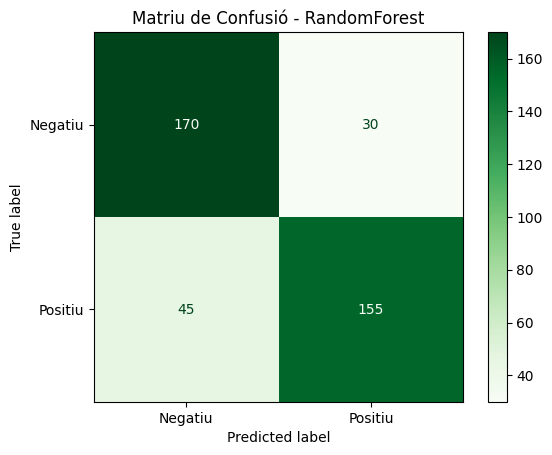

In [20]:
from sklearn.ensemble import RandomForestClassifier

grid_rf = GridSearchCV(RandomForestClassifier(random_state=42), {
    "n_estimators": [100],
    "max_depth": [5, 8, 10],
    "min_samples_split": [10, 20, 30]
}, cv=10, scoring='accuracy', n_jobs=-1)
grid_rf.fit(X_train, y_train)
rf_model = grid_rf.best_estimator_

y_train_pred_rf = rf_model.predict(X_train)
y_test_pred_rf = rf_model.predict(X_test)

print("\n\033[1mRandomForest\033[0m")
print("\033[1mMillors par√†metres:\033[0m", grid_rf.best_params_)
print(f"\033[1mAccuracy TRAIN:\033[0m {accuracy_score(y_train, y_train_pred_rf):.4f}")
print(f"\033[1mAccuracy TEST:\033[0m {accuracy_score(y_test, y_test_pred_rf):.4f}")
print("\n")
print(classification_report(y_test, y_test_pred_rf, target_names=["Negatiu", "Positiu"]))

# Matriu de confusi√≥
ConfusionMatrixDisplay.from_predictions(y_test, y_test_pred_rf, display_labels=["Negatiu", "Positiu"], cmap="Greens")
plt.title("Matriu de Confusi√≥ - RandomForest")
plt.grid(False)
plt.show()

# ROC
y_proba_rf = rf_model.predict_proba(X_test)[:, 1]
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_proba_rf)
auc_rf = auc(fpr_rf, tpr_rf)


#### **3. Regressi√≥ Log√≠stica**

La regressi√≥ log√≠stica √©s un model simple per√≤ molt robust, i s‚Äôutilitza molt en classificaci√≥ bin√†ria. L‚Äô√∫nic hiperpar√†metre que hem ajustat √©s `C`, que controla la regularitzaci√≥ del model. Com m√©s petit sigui `C`, m√©s es penalitzen els pesos alts (√©s a dir, m√©s regularitzaci√≥).

```python
"C": [0.001, 0.01, 0.1]
```

Aquesta gamma ens ha perm√®s explorar diferents nivells de simplicitat del model. Hem utilitzat el solver `'liblinear'` perqu√® funciona molt b√© amb conjunts petits i √©s compatible amb la regularitzaci√≥ L1/L2.


LogisticRegression
Millors par√†metres: {'C': 0.01}
Accuracy TRAIN: 0.9406
Accuracy TEST: 0.8650


              precision    recall  f1-score   support

     Negatiu       0.84      0.91      0.87       200
     Positiu       0.90      0.82      0.86       200

    accuracy                           0.86       400
   macro avg       0.87      0.86      0.86       400
weighted avg       0.87      0.86      0.86       400



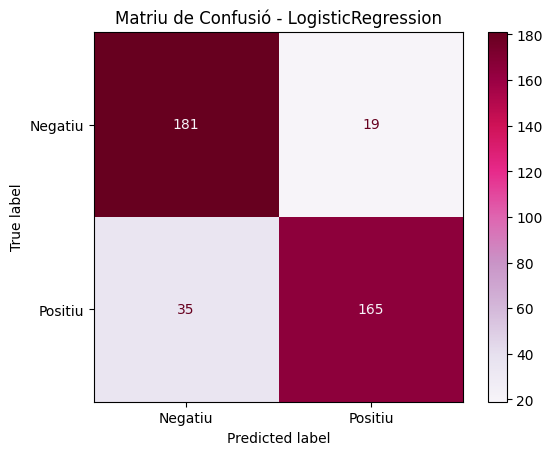

In [21]:
from sklearn.linear_model import LogisticRegression

grid_lr = GridSearchCV(LogisticRegression(max_iter=1000, solver='liblinear'), {
    "C": [0.001, 0.01, 0.1]
}, cv=10, scoring='accuracy', n_jobs=-1)
grid_lr.fit(X_train, y_train)
lr_model = grid_lr.best_estimator_

y_train_pred_lr = lr_model.predict(X_train)
y_test_pred_lr = lr_model.predict(X_test)

print("\n\033[1mLogisticRegression\033[0m")
print("\033[1mMillors par√†metres:\033[0m", grid_lr.best_params_)
print(f"\033[1mAccuracy TRAIN\033[0m: {accuracy_score(y_train, y_train_pred_lr):.4f}")
print(f"\033[1mAccuracy TEST\033[0m: {accuracy_score(y_test, y_test_pred_lr):.4f}")
print("\n")
print(classification_report(y_test, y_test_pred_lr, target_names=["Negatiu", "Positiu"]))

# Matriu de confusi√≥
ConfusionMatrixDisplay.from_predictions(y_test, y_test_pred_lr, display_labels=["Negatiu", "Positiu"], cmap="PuRd")
plt.title("Matriu de Confusi√≥ - LogisticRegression")
plt.grid(False)
plt.show()

# ROC
y_proba_lr = lr_model.predict_proba(X_test)[:, 1]
fpr_lr, tpr_lr, _ = roc_curve(y_test, y_proba_lr)
auc_lr = auc(fpr_lr, tpr_lr)


#### **4. SVM (Support Vector Machine)**

Per l‚ÄôSVM hem utilitzat un kernel lineal. Hem ajustat nom√©s el par√†metre `C`, que controla el marge del classificador.

```python
"C": [0.001, 0.005, 0.01, 0.1]
```

Com en el cas anterior, `C` ajuda a decidir si volem un marge m√©s ample (m√©s regularitzaci√≥) o m√©s estricte.


SVC
Millors par√†metres: {'C': 0.005, 'kernel': 'linear'}
Accuracy TRAIN: 0.9363
Accuracy TEST: 0.8525
              precision    recall  f1-score   support

     Negatiu       0.82      0.90      0.86       200
     Positiu       0.89      0.81      0.85       200

    accuracy                           0.85       400
   macro avg       0.86      0.85      0.85       400
weighted avg       0.86      0.85      0.85       400



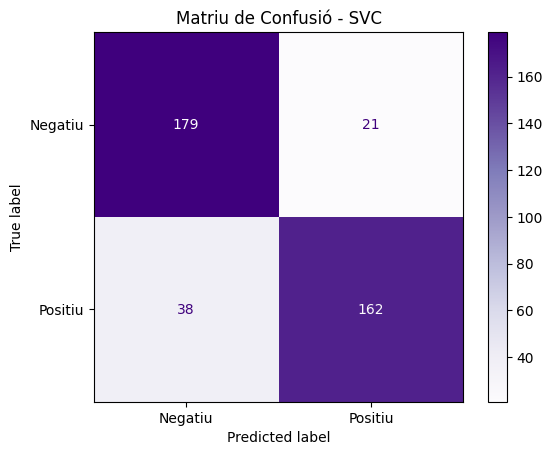

In [22]:
from sklearn.svm import SVC
from sklearn.metrics import ConfusionMatrixDisplay, roc_curve, auc

grid_svc = GridSearchCV(SVC(kernel='linear'), {
    "C": [0.001, 0.005, 0.01, 0.1]
}, cv=10, scoring='accuracy', n_jobs=-1)
grid_svc.fit(X_train, y_train)

best_C = grid_svc.best_params_["C"]
svc_model = SVC(kernel='linear', C=best_C, probability=True)
svc_model.fit(X_train, y_train)

y_train_pred_svc = svc_model.predict(X_train)
y_test_pred_svc = svc_model.predict(X_test)

print("\n\033[1mSVC\033[0m")
print("\033[1mMillors par√†metres:\033[0m", {"C": best_C, "kernel": "linear"})
print(f"\033[1mAccuracy TRAIN\033[0m: {accuracy_score(y_train, y_train_pred_svc):.4f}")
print(f"\033[1mAccuracy TEST\033[0m: {accuracy_score(y_test, y_test_pred_svc):.4f}")
print(classification_report(y_test, y_test_pred_svc, target_names=["Negatiu", "Positiu"]))

# Matriu de confusi√≥
ConfusionMatrixDisplay.from_predictions(
    y_test, y_test_pred_svc,
    display_labels=["Negatiu", "Positiu"],
    cmap='Purples'
)
plt.title("Matriu de Confusi√≥ - SVC")
plt.grid(False)
plt.show()

# ROC
y_proba_svc = svc_model.predict_proba(X_test)[:, 1]
fpr_svc, tpr_svc, _ = roc_curve(y_test, y_proba_svc)
auc_svc = auc(fpr_svc, tpr_svc)

#### **Comparaci√≥ de models amb la corba ROC**

Per visualitzar i comparar el rendiment dels diferents models, hem dibuixat la corba ROC de cadascun en el mateix gr√†fic. Aquesta corba mostra la relaci√≥ entre la taxa de falsos positius i la de veritables positius. L‚Äô√†rea sota la corba (AUC) ens proporciona una mesura clara de quin model distingeix millor entre positius i negatius.

Gr√†cies a aix√≤ podem veure quin model generalitza millor i no nom√©s t√© bons resultats sobre les dades d‚Äôentrenament.

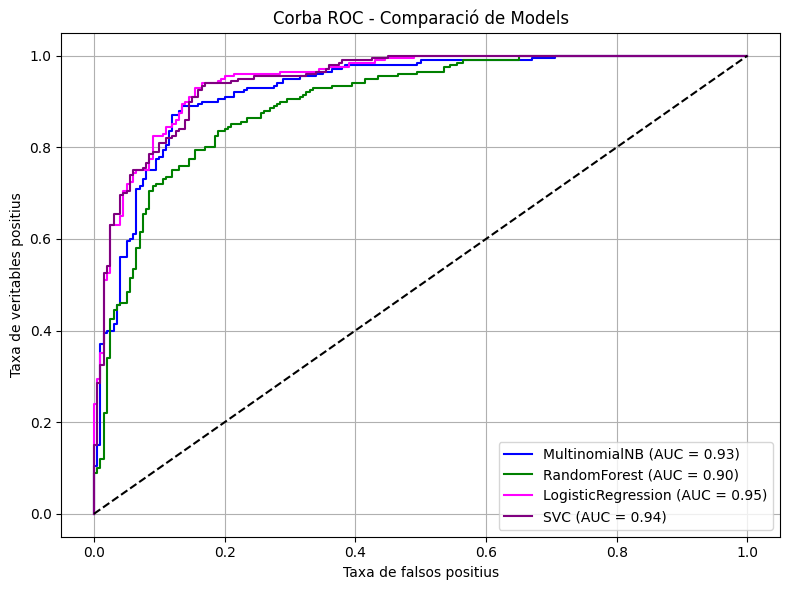

In [23]:
# Corba ROC de tots els models junts
plt.figure(figsize=(8, 6))
plt.plot(fpr_nb, tpr_nb, color='blue', label=f'MultinomialNB (AUC = {auc_nb:.2f})')
plt.plot(fpr_rf, tpr_rf, color='green', label=f'RandomForest (AUC = {auc_rf:.2f})')
plt.plot(fpr_lr, tpr_lr, color='fuchsia', label=f'LogisticRegression (AUC = {auc_lr:.2f})')
plt.plot(fpr_svc, tpr_svc, color='purple', label=f'SVC (AUC = {auc_svc:.2f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('Taxa de falsos positius')
plt.ylabel('Taxa de veritables positius')
plt.title('Corba ROC - Comparaci√≥ de Models')
plt.legend(loc='lower right')
plt.grid(True)
plt.tight_layout()
plt.show()


#### **Selecci√≥ del millor model**

In [24]:
# Diccionari amb resultats
resultats = {
    "Model": ["MultinomialNB", "RandomForest", "LogisticRegression", "SVC"],
    "Accuracy Train": [
        accuracy_score(y_train, y_train_pred_nb),
        accuracy_score(y_train, y_train_pred_rf),
        accuracy_score(y_train, y_train_pred_lr),
        accuracy_score(y_train, y_train_pred_svc)
    ],
    "Accuracy Test": [
        accuracy_score(y_test, y_test_pred_nb),
        accuracy_score(y_test, y_test_pred_rf),
        accuracy_score(y_test, y_test_pred_lr),
        accuracy_score(y_test, y_test_pred_svc)
    ],
    "Millors Par√†metres": [
        grid_nb.best_params_,
        grid_rf.best_params_,
        grid_lr.best_params_,
        grid_svc.best_params_
    ]
}

# Crear DataFrame i ordenar pel millor Accuracy de Test
df_resultats = pd.DataFrame(resultats)
df_resultats_ordenat = df_resultats.sort_values(by="Accuracy Test", ascending=False)

# Mostrar la taula
print("\n\033[1mComparativa final dels models:\033[0m\n")
print(df_resultats_ordenat.to_string(index=False))

# Mostrar el millor model
millor_model = df_resultats_ordenat.iloc[0]
print(f"\nEl millor model √©s \033[1m{millor_model['Model']}\033[0m amb una accuracy de test del {millor_model['Accuracy Test']:.4f}")
print(f"\033[1mMillors hiperpar√†metres:\033[0m {millor_model['Millors Par√†metres']}")



Comparativa final dels models:

             Model  Accuracy Train  Accuracy Test                                              Millors Par√†metres
LogisticRegression        0.940625         0.8650                                                     {'C': 0.01}
     MultinomialNB        0.891875         0.8525                                                  {'alpha': 5.0}
               SVC        0.936250         0.8525                                                    {'C': 0.005}
      RandomForest        0.971875         0.8125 {'max_depth': 10, 'min_samples_split': 10, 'n_estimators': 100}

El millor model √©s LogisticRegression amb una accuracy de test del 0.8650
Millors hiperpar√†metres: {'C': 0.01}


#### **Conclusi√≥ primera part**

Despr√©s d‚Äôentrenar i avaluar diversos models de classificaci√≥, hem comprovat que la **Regressi√≥ Log√≠stica** ha estat el model amb millor rendiment global. Ha obtingut la **millor accuracy de test (0.8650)** i tamb√© el **valor AUC m√©s alt (0.95)** a la corba ROC, cosa que indica una molt bona capacitat de separaci√≥ entre classes. 

Aquest resultat s‚Äôha assolit amb el par√†metre `C = 0.01`, que ha proporcionat un bon equilibri entre regularitzaci√≥ i ajust del model.

Altres models com **SVC** i **MultinomialNB** tamb√© han tingut un bon comportament, per√≤ lleugerament inferior. El model **Random Forest**, tot i tenir una alta precisi√≥ en l'entrenament, ha presentat **sobreajustament**, amb un rendiment inferior en el conjunt de test.


## **PART NO SUPERVISADA**

---

En aquesta segona part de la pr√†ctica abordarem la classificaci√≥ d‚Äôopinions des d‚Äôun enfocament **no supervisat**, on no disposem d‚Äôetiquetes pr√®vies per entrenar un model. El nostre objectiu ser√† determinar la polaritat (positiva o negativa) dels textos analitzant el significat de les paraules que contenen.

Per fer-ho, utilitzarem el **desambiguador Lesk** per obtenir el *synset* m√©s probable de cada paraula, i a partir d‚Äôaqu√≠ extreurem els valors de **polaritat** mitjan√ßant el diccionari **SentiWordNet**. Experimentarem amb diferents combinacions de categories gramaticals (adjectius, noms, verbs, adverbis) i estrat√®gies d‚Äôagregaci√≥ per obtenir una predicci√≥ final per a cada document.

Finalment, compararem els resultats d‚Äôaquesta aproximaci√≥ amb els obtinguts en la part supervisada per analitzar les difer√®ncies de rendiment entre ambd√≥s enfocaments.


In [25]:
%pip install requests

Note: you may need to restart the kernel to use updated packages.


In [26]:
import nltk
from nltk.corpus import sentiwordnet as swn
from nltk.wsd import lesk
from nltk.tokenize import word_tokenize
import numpy as np

nltk.download('sentiwordnet')

[nltk_data] Downloading package sentiwordnet to
[nltk_data]     /Users/paula/nltk_data...
[nltk_data]   Package sentiwordnet is already up-to-date!


True

In [27]:
# Funci√≥ per obtenir el sentiment d'una paraula amb Lesk i SentiWordNet
def sentit_paraula_lesk(word, context, pos_tag):
    lesk_synset = lesk(context, word, pos=pos_tag)
    if lesk_synset:
        try:
            senti_synset = swn.senti_synset(lesk_synset.name())
            return senti_synset.pos_score(), senti_synset.neg_score()
        except:
            return None
    return None

### **Explicaci√≥ del funcionament**

Per desenvolupar un classificador no supervisat de sentiment, hem seguit els passos seg√ºents:

1. **Desambiguaci√≥ de paraules:**  hem utilitzat l‚Äôalgorisme **Lesk** per determinar el significat (*synset*) de cada paraula dins del seu context, segons la seva categoria gramatical, ja sigui adjectiu, verb, nom o adverbi.

2. **Obtenci√≥ del sentiment:**  un cop tenim el *synset*, consultem **SentiWordNet** per obtenir-ne els valors de **positivitat i negativitat** associats.

3. **Ponderaci√≥ i filtratge:**  inicialment, hem definit un sistema de ponderaci√≥ assignant **pes nom√©s als adjectius**, amb l‚Äôobjectiu d‚Äôanalitzar si aquesta categoria tenia un paper especialment rellevant en la detecci√≥ de sentiment.  Posteriorment, hem creat nous models on hem **modificat les ponderacions** i hem afegit **altres categories gramaticals** (com noms, verbs i adverbis) per comparar-ne l‚Äôimpacte en el rendiment global.  Tamb√© hem descartat les paraules amb valors de sentiment molt baixos (`min_sentiment`) i hem aplicat un llindar (`threshold`) per evitar classificacions en casos amb polaritat poc clara.

4. **Classificaci√≥ final del text:**  per cada document, hem sumat els valors positius i negatius de totes les paraules considerades. Si la difer√®ncia entre aquests valors supera el llindar establert, classifiquem el text com a **positiu** o **negatiu** segons quin predomini. Si no, apliquem una classificaci√≥ per defecte basada en la polaritat m√©s alta.



Resultats del model NO supervisat (SentiWordNet + Lesk millorada amb ponderaci√≥ i filtrat)]
Accuracy Test: 0.6200
              precision    recall  f1-score   support

     Negatiu       0.64      0.54      0.59       200
     Positiu       0.60      0.70      0.65       200

    accuracy                           0.62       400
   macro avg       0.62      0.62      0.62       400
weighted avg       0.62      0.62      0.62       400



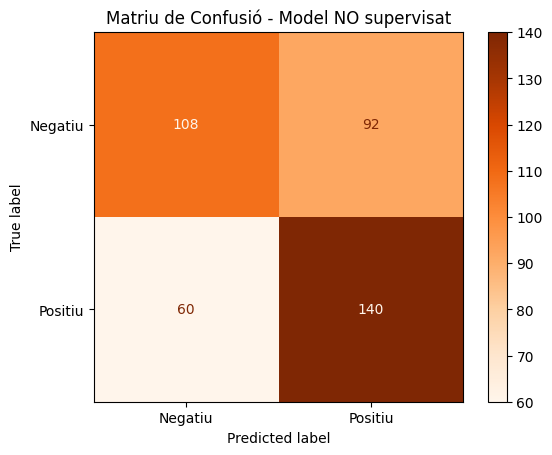

In [28]:
import numpy as np

# Diccionari de tags per conversi√≥ a WordNet i pesos especials per a pel¬∑l√≠cules
pos_tag_dict = {
    'JJ': ('a', 2.0), 'JJR': ('a', 2.0), 'JJS': ('a', 2.0),
}

# Funci√≥ per determinar la polaritat d'un text
def polaritat_text(text, categories=['a', 'r', 'n', 'v'], threshold=0.05, min_sentiment=0.2):
    tokens = nltk.word_tokenize(text)
    pos_tags = nltk.pos_tag(tokens)
    
    pos_scores, neg_scores = [], []

    for word, tag in pos_tags:
        if tag in pos_tag_dict:
            wn_tag, weight = pos_tag_dict[tag]
            if wn_tag in categories:
                sentiment = sentit_paraula_lesk(word, tokens, wn_tag)
                if sentiment and (sentiment[0] >= min_sentiment or sentiment[1] >= min_sentiment):
                    pos_scores.append(sentiment[0] * weight)
                    neg_scores.append(sentiment[1] * weight)

    pos_avg = np.mean(pos_scores) if pos_scores else 0
    neg_avg = np.mean(neg_scores) if neg_scores else 0

    if abs(pos_avg - neg_avg) < threshold:
        return 0
    else:
        return 1 if pos_avg > neg_avg else 0

# Prediccions sobre el conjunt de test
categories_a_fer_servir = ['a', 'r', 'n', 'v']  # adjectius, adverbis, noms, verbs

# Calculem les prediccions pel conjunt de test
y_pred_unsup = [polaritat_text(text, categories=categories_a_fer_servir) for text in test_texts_clean]

# Obtenim accuracy i altres m√®triques
print("\n\033[1mResultats del model NO supervisat (SentiWordNet + Lesk millorada amb ponderaci√≥ i filtrat)\033[0m]")
print(f"\033[1mAccuracy Test:\033[0m {accuracy_score(y_test, y_pred_unsup):.4f}")
print(classification_report(y_test, y_pred_unsup, target_names=['Negatiu', 'Positiu']))

# Matriu de confusi√≥
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_unsup, display_labels=["Negatiu", "Positiu"], cmap="Oranges")
plt.title("Matriu de Confusi√≥ - Model NO supervisat")
plt.grid(False)
plt.show()


Seguidament, hem definit una nova versi√≥ del model no supervisat, en la qual hem mantingut l‚Äô√∫s del desambiguador **Lesk** i el diccionari **SentiWordNet** per obtenir el sentiment de cada paraula. La principal novetat d'aquesta √©s la incorporaci√≥ de **ponderacions espec√≠fiques** per a diferents categories gramaticals,no sols els adjectius, amb l‚Äôobjectiu de reflectir la seva import√†ncia relativa en l‚Äôexpressi√≥ d‚Äôopinions. 

Les ponderacions assignades han estat:

- **Adjectius (`'a'`)**: pes 1.0  
  Considerem que els adjectius tenen un paper central en l‚Äôexpressi√≥ d‚Äôopinions, per√≤ no necess√†riament predominen num√®ricament en tots els textos.

- **Adverbis (`'r'`) i Verbs (`'v'`)**: pes 1.5  
  Hem incrementat el seu pes per valorar el seu impacte contextual en el to de la frase. Sovint matisen o intensifiquen el significat dels adjectius (p. ex. *"molt dolent"*, *"realment emocionant"*) o expressen accions amb c√†rrega emocional (*"va encantar-me"*, *"va decebre"*).

- **Noms (`'n'`)**: no ponderats expl√≠citament (per√≤ es poden afegir si cal)  
  Els noms sovint s√≥n m√©s neutres, per√≤ poden contenir informaci√≥ rellevant quan es combinen amb altres paraules carregades emocionalment.

Mitjan√ßant la definici√≥ d'aquets nou model, hem intentat analitzar la influ√®ncies de la polaritat de cada categoria gramatical en la classificaci√≥ obtinguda.



Resultats del model NO supervisat (SentiWordNet + Lesk millorada amb ponderaci√≥ i filtrat)
Accuracy Test: 0.5950
              precision    recall  f1-score   support

     Negatiu       0.69      0.34      0.46       200
     Positiu       0.56      0.85      0.68       200

    accuracy                           0.59       400
   macro avg       0.63      0.59      0.57       400
weighted avg       0.63      0.59      0.57       400



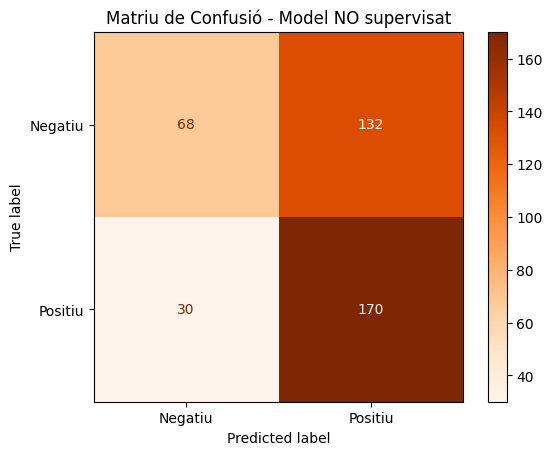

In [29]:
import numpy as np

# Diccionari de tags per conversi√≥ a WordNet i pesos especials per a pel¬∑l√≠cules
pos_tag_dict = {
    'JJ': ('a', 1.0), 'JJR': ('a', 1.0), 'JJS': ('a', 1.0),
    'RB': ('r', 1.5), 'RBR': ('r', 1.5), 'RBS': ('r', 1.5),
    'VB': ('v', 1.5), 'VBD': ('v', 1.5), 'VBG': ('v', 1.5), 'VBN': ('v', 1.5), 'VBP': ('v', 1.5), 'VBZ': ('v', 1.5)
}

# Funci√≥ per determinar la polaritat d'un text
def polaritat_text(text, categories=['a', 'r', 'n', 'v'], threshold=0.05, min_sentiment=0.2):
    tokens = nltk.word_tokenize(text)
    pos_tags = nltk.pos_tag(tokens)
    
    pos_scores, neg_scores = [], []

    for word, tag in pos_tags:
        if tag in pos_tag_dict:
            wn_tag, weight = pos_tag_dict[tag]
            if wn_tag in categories:
                sentiment = sentit_paraula_lesk(word, tokens, wn_tag)
                if sentiment and (sentiment[0] >= min_sentiment or sentiment[1] >= min_sentiment):
                    pos_scores.append(sentiment[0] * weight)
                    neg_scores.append(sentiment[1] * weight)

    pos_avg = np.mean(pos_scores) if pos_scores else 0
    neg_avg = np.mean(neg_scores) if neg_scores else 0

    if abs(pos_avg - neg_avg) < threshold:
        return 0  
    else:
        return 1 if pos_avg > neg_avg else 0

# Prediccions sobre el conjunt de test
categories_a_fer_servir = ['a', 'r', 'n', 'v']  # adjectius, adverbis, noms, verbs

# Calculem les prediccions pel conjunt de test
y_pred_unsup = [polaritat_text(text, categories=categories_a_fer_servir) for text in test_texts_clean]

# Obtenim accuracy i altres m√®triques
print("\n\033[1mResultats del model NO supervisat (SentiWordNet + Lesk millorada amb ponderaci√≥ i filtrat)\033[0m")
print(f"\033[1mAccuracy Test:\033[0m {accuracy_score(y_test, y_pred_unsup):.4f}")
print(classification_report(y_test, y_pred_unsup, target_names=['Negatiu', 'Positiu']))

# Matriu de confusi√≥
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_unsup, display_labels=["Negatiu", "Positiu"], cmap="Oranges")
plt.title("Matriu de Confusi√≥ - Model NO supervisat")
plt.grid(False)
plt.show()


Per √∫ltim, hem definit un **nou model** utilitzant les mateixes funcions i proc√©s de classificaci√≥, per√≤ modificant **les ponderacions assignades a cada categoria gramatical**.

Les ponderacions assignades han estat:

- **Adjectius (`'a'`)**: pes 1.0  
  Considerem que els adjectius tenen un paper central en l‚Äôexpressi√≥ d‚Äôopinions, per√≤ no necess√†riament predominen num√®ricament en tots els textos.

- **Adverbis (`'r'`) i Verbs (`'v'`)**: pes 1.5  
  Hem incrementat el seu pes per valorar el seu impacte contextual en el to de la frase. Sovint matisen o intensifiquen el significat dels adjectius (p. ex. *"molt dolent"*, *"realment emocionant"*) o expressen accions amb c√†rrega emocional (*"va encantar-me"*, *"va decebre"*).

- **Noms (`'n'`)**: no ponderats expl√≠citament (tot i que estan inclosos en l‚Äôan√†lisi)  
  Els noms solen tenir una c√†rrega emocional m√©s neutra, per√≤ poden aportar informaci√≥ rellevant quan es combinen amb altres paraules amb sentiment.

Aquesta versi√≥ ens ha ajudat a explorar com canvia la classificaci√≥ quan es dona m√©s pes a categories que sovint passen desapercebudes en models m√©s simples, i a comparar-ne els resultats amb les configuracions pr√®vies.




Resultats del model NO supervisat (SentiWordNet + Lesk millorada amb ponderaci√≥ i filtrat)
Accuracy Test: 0.6250
              precision    recall  f1-score   support

     Negatiu       0.70      0.45      0.54       200
     Positiu       0.59      0.81      0.68       200

    accuracy                           0.62       400
   macro avg       0.64      0.62      0.61       400
weighted avg       0.64      0.62      0.61       400



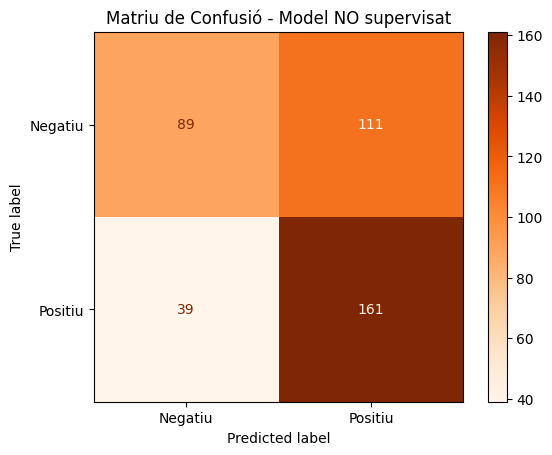

In [30]:
import numpy as np

# Diccionari de tags per conversi√≥ a WordNet i pesos especials per a pel¬∑l√≠cules
pos_tag_dict = {
    'NN': ('n', 1.0), 'NNS': ('n', 1.0), 'NNP': ('n', 1.0), 'NNPS': ('n', 1.0),
    'JJ': ('a', 2.0), 'JJR': ('a', 2.0), 'JJS': ('a', 2.0),
    'RB': ('r', 1.5), 'RBR': ('r', 1.5), 'RBS': ('r', 1.5),
    'VB': ('v', 1.5), 'VBD': ('v', 1.5), 'VBG': ('v', 1.5), 'VBN': ('v', 1.5), 'VBP': ('v', 1.5), 'VBZ': ('v', 1.5)
}

# Funci√≥ per determinar la polaritat d'un text complet
def polaritat_text(text, categories=['a', 'r', 'n', 'v'], threshold=0.05, min_sentiment=0.2):
    tokens = nltk.word_tokenize(text)
    pos_tags = nltk.pos_tag(tokens)
    
    pos_scores, neg_scores = [], []

    for word, tag in pos_tags:
        if tag in pos_tag_dict:
            wn_tag, weight = pos_tag_dict[tag]
            if wn_tag in categories:
                sentiment = sentit_paraula_lesk(word, tokens, wn_tag)
                if sentiment and (sentiment[0] >= min_sentiment or sentiment[1] >= min_sentiment):
                    pos_scores.append(sentiment[0] * weight)
                    neg_scores.append(sentiment[1] * weight)

    pos_avg = np.mean(pos_scores) if pos_scores else 0
    neg_avg = np.mean(neg_scores) if neg_scores else 0

    if abs(pos_avg - neg_avg) < threshold:
        return 0
    else:
        return 1 if pos_avg > neg_avg else 0

# Prediccions sobre el conjunt de test
categories_a_fer_servir = ['a', 'r', 'n', 'v']  # adjectius, adverbis, noms, verbs

# Calculem les prediccions pel conjunt de test
y_pred_unsup = [polaritat_text(text, categories=categories_a_fer_servir) for text in test_texts_clean]

# Obtenim accuracy i altres m√®triques
print("\n\033[1mResultats del model NO supervisat (SentiWordNet + Lesk millorada amb ponderaci√≥ i filtrat)\033[0m")
print(f"\033[1mAccuracy Test:\033[0m {accuracy_score(y_test, y_pred_unsup):.4f}")
print(classification_report(y_test, y_pred_unsup, target_names=['Negatiu', 'Positiu']))

# Matriu de confusi√≥
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_unsup, display_labels=["Negatiu", "Positiu"], cmap="Oranges")
plt.title("Matriu de Confusi√≥ - Model NO supervisat")
plt.grid(False)
plt.show()



Despr√©s de provar diverses configuracions del model no supervisat, el millor resultat s‚Äôha obtingut amb **l‚Äô√∫ltima versi√≥** que incorpora ponderacions diferenciades per categoria gramatical.

Aquest model ha assolit una **accuracy de test del 0.6250**, millorant lleugerament respecte a versions anteriors. A m√©s, ha destacat per un **alt recall en la classe positiva (0.81)**, tot i que amb un **recall m√©s baix en la negativa (0.45)**.

Aquesta versi√≥ ha estat seleccionada com **la m√©s adequada** per dur a terme la **comparativa amb els models supervisats**.

La manipulaci√≥ dels pesos ens ha perm√®s **ajustar el comportament del model** i observar de manera directa **la influ√®ncia i import√†ncia de cada categoria gramatical** (adjectius, adverbis, verbs i noms) en el c√†lcul del sentiment. Aquest proc√©s d‚Äôexperimentaci√≥ ens ha ajudat a entendre millor com les decisions de disseny poden afectar el rendiment d‚Äôun model no supervisat.


## **COMPARACI√ì MODEL SUPERVISAT I NO SUPERVISAT**


Comparaci√≥ amb el millor model supervisat
Millor model supervisat (Accuracy Test): 0.8650 (LogisticRegression)
Model no supervisat (Accuracy Test): 0.6250


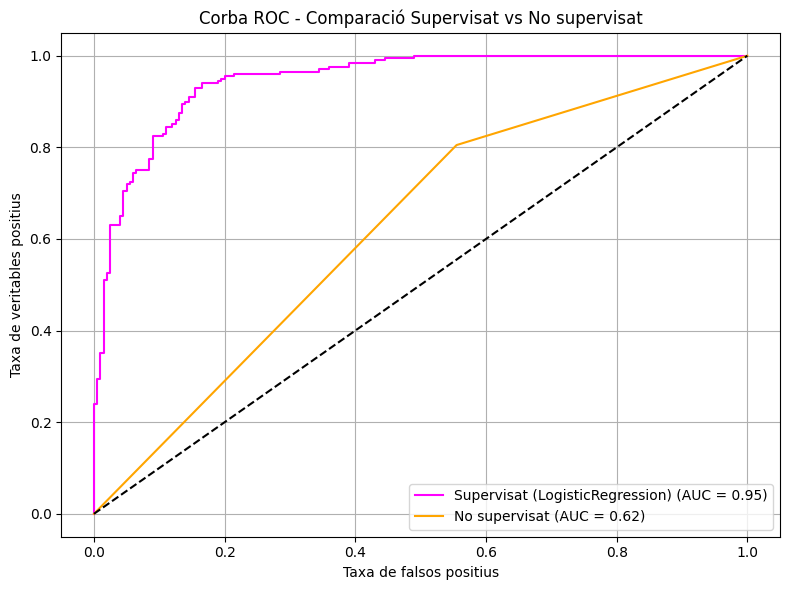

In [31]:
best_models = {
    "MultinomialNB": nb_model,
    "RandomForest": rf_model,
    "LogisticRegression": lr_model,
    "SVC": svc_model
}

# Comparaci√≥ amb el millor model supervisat
print("\n\033[1mComparaci√≥ amb el millor model supervisat\033[0m")
print(f"\033[1mMillor model supervisat (Accuracy Test):\033[0m {millor_model['Accuracy Test']:.4f} ({millor_model['Model']})")
print(f"\033[1mModel no supervisat (Accuracy Test):\033[0m {accuracy_score(y_test, y_pred_unsup):.4f}")

# Corba ROC comparativa
plt.figure(figsize=(8, 6))

# Supervisat
fpr_sup, tpr_sup, _ = roc_curve(y_test, best_models[millor_model['Model']].predict_proba(X_test)[:, 1])
auc_sup = auc(fpr_sup, tpr_sup)
plt.plot(fpr_sup, tpr_sup, label=f"Supervisat ({millor_model['Model']}) (AUC = {auc_sup:.2f})", color="fuchsia")

# No supervisat
fpr_unsup, tpr_unsup, _ = roc_curve(y_test, y_pred_unsup)
auc_unsup = auc(fpr_unsup, tpr_unsup)
plt.plot(fpr_unsup, tpr_unsup, label=f"No supervisat (AUC = {auc_unsup:.2f})", color="orange")

plt.plot([0, 1], [0, 1], 'k--')  # l√≠nia diagonal
plt.xlabel('Taxa de falsos positius')
plt.ylabel('Taxa de veritables positius')
plt.title('Corba ROC - Comparaci√≥ Supervisat vs No supervisat')
plt.legend(loc='lower right')
plt.grid(True)
plt.tight_layout()
plt.show()

La comparaci√≥ entre el millor model supervisat (Regressi√≥ Log√≠stica) i el millor model no supervisat mostra una difer√®ncia clara de rendiment.

El model **supervisat** ha assolit una **accuracy del 86.5%** i un **AUC de 0.95**, destacant per la seva gran capacitat de separaci√≥ entre classes i precisi√≥ en les prediccions. Per contra, el model **no supervisat** ha aconseguit una **accuracy del 62.5%** i un **AUC de 0.62**, amb resultats molt m√©s modestos.

Tot i aix√≤, cal remarcar que el model no supervisat no ha requerit dades etiquetades, i mitjan√ßant l‚Äôajust dels pesos i les estrat√®gies de filtratge, hem pogut millorar-ne el comportament. Aquesta comparaci√≥ ens ha perm√®s veure clarament els **avantatges de l‚Äôaprenentatge supervisat** en tasques de classificaci√≥, per√≤ tamb√© el potencial de models no supervisats quan les dades etiquetades no estan disponibles.

El model supervisat (Regressi√≥ Log√≠stica) ha superat clarament el model no supervisat tant en **accuracy** com en **capacitat de discriminaci√≥ (AUC)** i aquestes s√≥n les petites diferencies que mostren tots dos models:

- **Acc√©s a dades etiquetades**: el model supervisat s'entrena amb exemples reals ja classificats, cosa que li permet aprendre patrons espec√≠fics i ajustar-se millor a les caracter√≠stiques dels textos. El model no supervisat, en canvi, no disposa d‚Äôaquesta informaci√≥ i ha de basar-se √∫nicament en recursos externs com SentiWordNet.

- **Aprenentatge basat en dades reals**: el model supervisat pot adaptar-se a com s‚Äôexpressa el sentiment en el conjunt concret de dades, mentre que el model no supervisat dep√®n de valoracions gen√®riques de paraules, que poden no captar b√© el context.

- **Capacitat de generalitzaci√≥**: tot i el risc d‚Äô*overfitting*, els models supervisats, si es validen correctament, poden generalitzar millor perqu√® aprenen d‚Äôexemples reals i representatius.

En resum, el model supervisat √©s superior perqu√® pot aprendre directament dels casos reals, mentre que el no supervisat parteix de suposicions m√©s generals sobre el llenguatge.



## **AN√ÄLISI DELS ERRORS**

---

Per complementar la comparativa, hem fet una **breu an√†lisi dels errors de classificaci√≥** amb l‚Äôobjectiu de detectar si existeixen **caracter√≠stiques comunes** entre els casos mal classificats, tant en el model supervisat com en el no supervisat.

Em realitzat aquest an√†lisis amb l'obejctiu d'identificar **limitacions compartides** i oportunitats de millora, especialment pel que fa al tractament del context i a la desambiguaci√≥ sem√†ntica.


In [32]:
y_pred_sup = best_models["LogisticRegression"].predict(X_test)

def analisi_errors_comparat(test_texts, y_test, y_pred_sup, y_pred_unsup):
    total = len(y_test)
    
    errors_sup = sum([1 for true, pred in zip(y_test, y_pred_sup) if true != pred])
    errors_unsup = sum([1 for true, pred in zip(y_test, y_pred_unsup) if true != pred])
    
    print("\033[1mAn√†lisi d'errors comparatiu\033[0m")
    print("-" * 50)
    print(f"\033[1mTotal de textos:\033[0m {total}")
    print(f"\033[1mErrors model supervisat:\033[0m {errors_sup}")
    print(f"\033[1mErrors model no supervisat:\033[0m {errors_unsup}")

analisi_errors_comparat(test_texts, y_test, y_pred_sup, y_pred_unsup)

An√†lisi d'errors comparatiu
--------------------------------------------------
Total de textos: 400
Errors model supervisat: 54
Errors model no supervisat: 150


In [33]:
def mostra_errors_comuns(test_texts, y_test, y_pred_sup, y_pred_unsup):
    print("\n\033[1mTextos mal classificats per TOTS DOS models:\033[0m")
    errors_ambd√≥s = [
        (i, text, y, sup, unsup)
        for i, (text, y, sup, unsup) in enumerate(zip(test_texts, y_test, y_pred_sup, y_pred_unsup))
        if sup != y and unsup != y
    ]
    
    if not errors_ambd√≥s:
        print("\033[1mCap text mal classificat pels dos models a la vegada.\033[1m")
    else:
        for i, text, y, sup, unsup in errors_ambd√≥s:
            print(f"\nüìÑ #{i+1}")
            print(f"\033[1mText:\033[0m {text[:300]}...")
            print(f"\033[1mReal:\033[0m {'Positiu' if y==1 else 'Negatiu'} | Supervisat: {'Positiu' if sup==1 else 'Negatiu'} | No Supervisat: {'Positiu' if unsup==1 else 'Negatiu'}")

mostra_errors_comuns(test_texts_clean, y_test, y_pred_sup, y_pred_unsup)


Textos mal classificats per TOTS DOS models:

üìÑ #7
Text: base novel set joseph conrad victory spin tale pair lover heyst william dafoe alma irene jacob seek refuge heyst isolated island however idyllic world begin crumble upon arrival mr jones sam neil martin ricardo rufus sewell servant pedro graziano marcelli come steal heyst rumour plunder novel largel...
Real: Negatiu | Supervisat: Positiu | No Supervisat: Positiu

üìÑ #23
Text: moviemaking lot like general manager nfl team post salary cap era get know allocate resource every dollar spend free agent defensive tackle one less dollar spend linebacker safety center nfl lead team like detroit lion boast superstar run back huge contract field five guy name herb block movie end f...
Real: Positiu | Supervisat: Negatiu | No Supervisat: Negatiu

üìÑ #29
Text: reasonable human would must admit occasionally befuddle certain thing befuddle fight club sometimes favorite film pan critic achieve critical success much later sometimes much t

**Textos mal classificats per tots dos models ‚Äì An√†lisi d‚Äôerrors comuns**

Hem detectat un conjunt de textos que han estat mal classificats tant pel model supervisat com pel no supervisat. Aquesta coincid√®ncia en l‚Äôerror ens indica que existeixen **caracter√≠stiques textuals espec√≠fiques** que dificulten la classificaci√≥, independentment de l‚Äôenfocament utilitzat.

Alguns factors comuns observats en aquests textos s√≥n:

- **Llenguatge ambigu o neutre**: molts textos no expressen opinions clares o directes, sin√≥ que barregen elements positius i negatius, fan servir ironia o mantenen un to narratiu m√©s informatiu que valoratiu.

- **Construccions llargues i complexes**: en diversos casos, els textos s√≥n extensos i amb frases complicades, cosa que pot dificultar tant la detecci√≥ de sentiments concrets (model no supervisat) com l'extracci√≥ de patrons clars (model supervisat).

- **Expressions poc habituals o estil elaborat**: alguns textos utilitzen vocabulari ric, figures ret√≤riques o met√†fores, que poden escapar als recursos com SentiWordNet o no haver estat ben representats durant l‚Äôentrenament del model supervisat.

- **Opinions impl√≠cites**: en diversos exemples, la valoraci√≥ de la pel¬∑l√≠cula s‚Äôintueix pel context o el to, per√≤ no s‚Äôexpressa expl√≠citament amb paraules t√≠picament associades al sentiment (com *"fant√†stic"*, *"horrible"*, *"decebedor"*, etc.).

Aquest an√†lisi mostra que existeixen **zones complicades o amb limitacions** dins la classificaci√≥ de sentiments on cap model aconsegueix interpretar correctament el contingut. Aix√≤ ens mostra la import√†ncia de millorar la comprensi√≥ contextual i sem√†ntica en futurs models.


In [34]:
def mostra_sup_ok_unsup_ko(test_texts, y_test, y_pred_sup, y_pred_unsup):
    print("\n\033[1mTextos classificats b√© pel SUPERVISAT per√≤ malament pel NO SUPERVISAT:\033[0m")
    casos = [
        (i, text, y, sup, unsup)
        for i, (text, y, sup, unsup) in enumerate(zip(test_texts, y_test, y_pred_sup, y_pred_unsup))
        if sup == y and unsup != y
    ]
    
    if not casos:
        print("\033[1mCap text amb aquest cas.\033[0m")
    else:
        for i, text, y, sup, unsup in casos:
            print(f"\nüìÑ #{i+1}")
            print(f"\033[1mText:\033[0m {text[:300]}...")
            print(f"\033[1mReal:\033[0m {'Positiu' if y==1 else 'Negatiu'} | Supervisat: {'Positiu' if sup==1 else 'Negatiu'} | No Supervisat: {'Positiu' if unsup==1 else 'Negatiu'}")

mostra_sup_ok_unsup_ko(test_texts_clean, y_test, y_pred_sup, y_pred_unsup)


Textos classificats b√© pel SUPERVISAT per√≤ malament pel NO SUPERVISAT:

üìÑ #9
Text: late lead female character julia stile state great fear artificial conversation boyfriend freddie prinze jr irony statement lose audience member yet walk fallen asleep otherwise give pathetic attempt romantic comedy film multi million dollar testament everything artificial fill character motivation ...
Real: Negatiu | Supervisat: Negatiu | No Supervisat: Positiu

üìÑ #12
Text: highly intelligent life form completely electronic nature beam onto russian science vessel well point movie stray become decent original movie simply become predictable sci fi thriller anyhow life form take control computer russian vessel start create highly advanced robot help gruesome task extermi...
Real: Negatiu | Supervisat: Negatiu | No Supervisat: Positiu

üìÑ #16
Text: plot rich psychiatrist great home life get cute daughter kidnap bad guy want extract information mind one nutty patient course patient cooperative do

**Textos classificats b√© pel model supervisat per√≤ malament pel no supervisat**

Hem identificat diversos textos que el model **supervisat** ha classificat correctament mentre que el **no supervisat** ha fallat. Aquests textos ens permet destacar algunes de les limitacions espec√≠fiques del model no supervisat i, alhora, entendre per qu√® el supervisat √©s m√©s efectiu en aquests casos.

Algunes observacions generals sobre aquests textos:

- **Context complex o ir√≤nic**: molts textos utilitzen ironia, sarcasme o cr√≠tiques indirectes que no es reflecteixen en paraules amb polaritat clara. El model supervisat, entrenat amb exemples similars, √©s capa√ß de captar aquest tipus de construcci√≥. El no supervisat, en canvi, dep√®n exclusivament del significat individual de les paraules i sol confondre‚Äôs.

- **Cr√≠tiques negatives expressades amb llenguatge neutre o sofisticat**: en molts casos, el sentiment negatiu no es manifesta amb paraules clarament negatives, sin√≥ a trav√©s del to general o de l‚Äôestructura del discurs. Aix√≤ fa que el model no supervisat, que no ent√©n el context global, assigni una polaritat incorrecta.

- **Ambig√ºitat sem√†ntica**: El model no supervisat pot interpretar com a positives algunes paraules que, en context, formen part d‚Äôuna cr√≠tica. El model supervisat, en canvi, ha apr√®s de casos similars i pot recon√®ixer patrons de frase que porten a una millor interpretaci√≥.

Aquest patr√≥ d‚Äôerrors refor√ßa la idea que els models **supervisats poden aprendre matisos i estructures m√©s complexes**, mentre que els models **no supervisats s√≥n molt m√©s sensibles a l‚Äôelecci√≥ i al pes de les paraules individuals**, sense entendre el missatge global del text.


In [35]:
def mostra_unsup_ok_sup_ko(test_texts, y_test, y_pred_sup, y_pred_unsup):
    print("\n\033[1mTextos classificats b√© pel NO SUPERVISAT per√≤ malament pel SUPERVISAT:\033[0m")
    casos = [
        (i, text, y, sup, unsup)
        for i, (text, y, sup, unsup) in enumerate(zip(test_texts, y_test, y_pred_sup, y_pred_unsup))
        if sup != y and unsup == y
    ]
    
    if not casos:
        print("\033[1mCap text amb aquest cas.\033[0m")
    else:
        for i, text, y, sup, unsup in casos:
            print(f"\nüìÑ #{i+1}")
            print(f"\033[1mText:\033[0m {text[:300]}...")
            print(f"\033[1mReal:\033[0m {'Positiu' if y==1 else 'Negatiu'} | Supervisat: {'Positiu' if sup==1 else 'Negatiu'} | No Supervisat: {'Positiu' if unsup==1 else 'Negatiu'}")

mostra_unsup_ok_sup_ko(test_texts_clean, y_test, y_pred_sup, y_pred_unsup)


Textos classificats b√© pel NO SUPERVISAT per√≤ malament pel SUPERVISAT:

üìÑ #11
Text: china turn table national guide ask question america guess expect sort political question instead dumfounded mind america wife mother law get along well assure china certain true would ask even china people seem problem relate law perhaps life difficult relationship arise family suddenly artificiall...
Real: Negatiu | Supervisat: Positiu | No Supervisat: Negatiu

üìÑ #17
Text: billy crystal reappears yet another high concept comedy try infuse life get bogged sentimentality lack sophistication sammy billy crystal struggle agent end rope separate wife serena kathleen quinlan last serious client low budget film shoot romania turn bad luck sammy wreck car mysteriously save gi...
Real: Negatiu | Supervisat: Positiu | No Supervisat: Negatiu

üìÑ #48
Text: usually movie something soiled rug big lebowski new offering creator critical hit fargo say least wildly entertain originality always strong trait c

**Textos classificats b√© pel model NO supervisat per√≤ malament pel supervisat**

Tot i que en general el model supervisat ha obtingut millors resultats, tamb√© hem detectat alguns casos on el model **no supervisat ha estat m√©s encertat**. Aquests exemples ens ajuden a entendre en quines situacions l‚Äôenfocament no supervisat pot tenir un avantatge.

Els patrons que hem observat s√≥n:

- **Pres√®ncia de paraules amb polaritat clara**: En molts d‚Äôaquests textos hi ha adjectius, verbs o expressions clarament positives o negatives. El model no supervisat, basat en SentiWordNet, aprofita aquestes puntuacions per prendre decisions m√©s encertades en aquests casos.

- **Errors d‚Äôaprenentatge del model supervisat**: El model supervisat pot haver classificat err√≤niament aquests textos perqu√® durant l‚Äôentrenament no ha vist exemples prou similars, o b√© perqu√® ha apr√®s patrons erronis (overfitting).

- **Valoraci√≥ m√©s directa i menys contextual**: En alguns casos, el model no supervisat pot funcionar millor quan el sentiment est√† expressat de forma simple i clara, sense necessitat d'interpretar construccions ling√º√≠stiques complexes.

Aquest an√†lisi posa en relleu que, malgrat les seves limitacions, els models no supervisats poden resultar √∫tils en entorns amb menys dades, i que una **combinaci√≥ h√≠brida** de m√®todes podria millorar encara m√©s els resultats en futurs treballs.


## **CONCLUSI√ì GENERAL**

---

En aquest treball hem desenvolupat i comparat dos enfocaments per a la detecci√≥ autom√†tica d'opinions en cr√≠tiques de pel¬∑l√≠cules, un de supervisat i un de no supervisat.

Pel que fa al **model supervisat**, hem provat diversos algoritmes d'aprenentatge autom√†tic (com Logistic Regression, SVM, Random Forest i Naive Bayes), i hem ajustat els hiperpar√†metres mitjan√ßant validaci√≥ creuada. El model que ha obtingut els **millors resultats** ha estat la **regressi√≥ log√≠stica**, amb una *accuracy* del **86.5%** i un AUC de **0.95**. Aquest model ha estat capa√ß de capturar patrons complexos en les dades gr√†cies a l'entrenament amb exemples etiquetats.

En canvi, el model **no supervisat**, basat en **SentiWordNet i desambiguaci√≥ sem√†ntica amb l‚Äôalgorisme de Lesk**, no requeria dades etiquetades. Tot i que els seus resultats han estat inferiors (*accuracy* del **62.5%**, AUC de **0.62**), hem pogut observar que **ajustant les ponderacions dels tipus de paraules** (adjectius, adverbis, verbs...) hem millorat notablement la classificaci√≥ respecte a una versi√≥ inicial m√©s simple. Aix√≤ demostra la rellev√†ncia d‚Äôanalitzar el pes i la influ√®ncia de les categories gramaticals en la detecci√≥ de sentiments.

L‚Äôan√†lisi d‚Äôerrors ens ha perm√®s detectar situacions habituals de classificaci√≥ incorrecta, com ara textos amb ironia, estructura narrativa o valoracions impl√≠cites. Tamb√© hem observat que hi ha **casos on el model no supervisat ha superat el supervisat**, generalment quan el llenguatge utilitzat era m√©s directe o contenia paraules amb polaritat molt clara.

Finalment, la realitzaci√≥ d'aquest treball i la implementaci√≥ de l'an√†lisis dels errors, ens ha perm√®s concloure els models **supervisats s√≥n m√©s potents i precisos** quan disposem d‚Äôun conjunt d‚Äôentrenament representatiu. No obstant aix√≤, els **models no supervisats poden ser √∫tils en contextos amb escassetat de dades etiquetades**, i ofereixen una base interessant per combinar amb m√®todes h√≠brids en futurs estudis.
